In [446]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# **Data Extraction**

In [447]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [448]:
df = pd.read_csv('drive/MyDrive/dataset_test.txt', sep=',')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key_1    1000 non-null   object 
 1   date_2   1000 non-null   object 
 2   cont_3   1000 non-null   float64
 3   cont_4   1000 non-null   float64
 4   disc_5   1000 non-null   int64  
 5   disc_6   1000 non-null   object 
 6   cat_7    1000 non-null   object 
 7   cat_8    1000 non-null   object 
 8   cont_9   1000 non-null   float64
 9   cont_10  1000 non-null   float64
 10  label    1000 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 86.1+ KB
None


,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,cont_10,label
0,na,2003-04-06,-0.90,-3.82,1,19,happy,blue,0.37,3.92,2.5
1,UV7055,2013-08-22,-0.35,2.23,5,13,surprised,green,0.05,0.60,3.19
2,oM1806,2002-10-10,0.93,-12.12,2,11,happy,green,0.08,0.75,2.33
3,YJ8175,2015-01-01,1.23,-7.21,1,14,scared,purple,-0.69,-7.24,2.54
4,VF7543,2014-03-03,-1.87,-9.02,3,9,happy,blue,1.01,11.16,2.1
...,...,...,...,...,...,...,...,...,...,...,...
995,SW6268,2001-11-30,-0.42,-18.36,2,16,scared,orange,2.70,23.41,3.49
996,QR0417,2010-02-04,-1.85,-8.99,1,9,surprised,green,-1.12,-9.16,1.27
997,UI7021,2009-05-02,-0.96,-19.40,0,0,surprised,blue,-1.71,-16.33,na
998,QH8767,2001-02-01,-0.77,2.73,3,19,surprised,orange,2.06,21.55,na


# **Data Preparation and Transformation**

In [449]:
#there are multiple NA values per row
df = df.replace('na', np.nan)
print("number or NA per row:")
print(pd.Series(df.isnull().sum(axis=1)).unique())
print("")
print("Table of NA values")
print(df.isna().sum())

number or NA per row:
[1 0 2 3]

Table of NA values
key_1      104
date_2       0
cont_3       0
cont_4       0
disc_5       0
disc_6      92
cat_7        0
cat_8        0
cont_9       0
cont_10      0
label      103
dtype: int64


In [450]:
#checking if there are duplicated keys
dk=df[df.duplicated(['key_1'])]
print("number of NA in key_1 is the same that duplicated values--> "+str(len(dk)+1)) #additional 1 is first NA value in column

number of NA in key_1 is the same that duplicated values--> 104


In [451]:
#deleting NA values in 'label'
df.dropna(subset=['label'],inplace=True)

In [452]:
#checking how many na values per row remains (without taking 'key_1' into account)
pd.Series(df.iloc[:,3:].isnull().sum(axis=1)).unique()

array([0, 1])

mode is 16
mean is 10


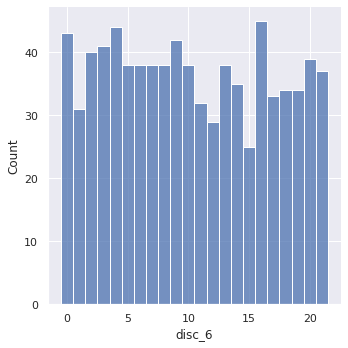

In [453]:
df['disc_6']=pd.to_numeric(df['disc_6'])
sns.displot(df.disc_6, discrete=True)

print("mode is "+ str(int(df['disc_6'].mode())))
print("mean is "+ str(int(df['disc_6'].mean())))

#imputation was considered but given that there are 92 data points to be altered, the distribution of the variable would be affected

In [454]:
#deleting NA values from 'disc_6'
df.dropna(subset=['disc_6'],inplace=True)
df=df.reset_index()
df.head()

,index,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,cont_10,label
0,0,NaN,2003-04-06,-0.90,-3.82,1,19.0,happy,blue,0.37,3.92,2.5
1,1,UV7055,2013-08-22,-0.35,2.23,5,13.0,surprised,green,0.05,0.60,3.19
2,2,oM1806,2002-10-10,0.93,-12.12,2,11.0,happy,green,0.08,0.75,2.33
3,3,YJ8175,2015-01-01,1.23,-7.21,1,14.0,scared,purple,-0.69,-7.24,2.54
4,4,VF7543,2014-03-03,-1.87,-9.02,3,9.0,happy,blue,1.01,11.16,2.1


In [455]:
#adjusting variables data types
df['label']=df['label'].astype('float')
df['disc_5']=df['disc_5'].astype('int')
df['disc_6'] = df['disc_6'].astype('int')
df['date_2']=pd.to_datetime(df['date_2'])
df.info()
print("\n")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    812 non-null    int64         
 1   key_1    732 non-null    object        
 2   date_2   812 non-null    datetime64[ns]
 3   cont_3   812 non-null    float64       
 4   cont_4   812 non-null    float64       
 5   disc_5   812 non-null    int64         
 6   disc_6   812 non-null    int64         
 7   cat_7    812 non-null    object        
 8   cat_8    812 non-null    object        
 9   cont_9   812 non-null    float64       
 10  cont_10  812 non-null    float64       
 11  label    812 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 76.2+ KB


index       0
key_1      80
date_2      0
cont_3      0
cont_4      0
disc_5      0
disc_6      0
cat_7       0
cat_8       0
cont_9      0
cont_10     0
label       0
dtype: int64


In [456]:
df[df.duplicated()] #there aren't duplicated rows

,index,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,cont_10,label


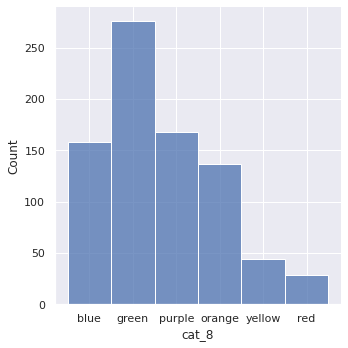

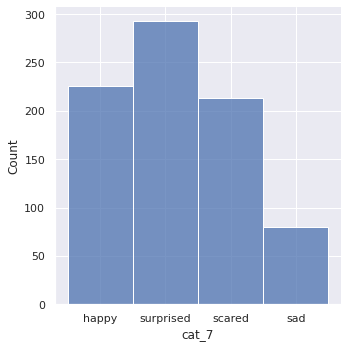

In [457]:
#to check if there are unusual categories in the categorical variables
sns.displot(df.cat_8, discrete=True)
sns.displot(df.cat_7, discrete=True)

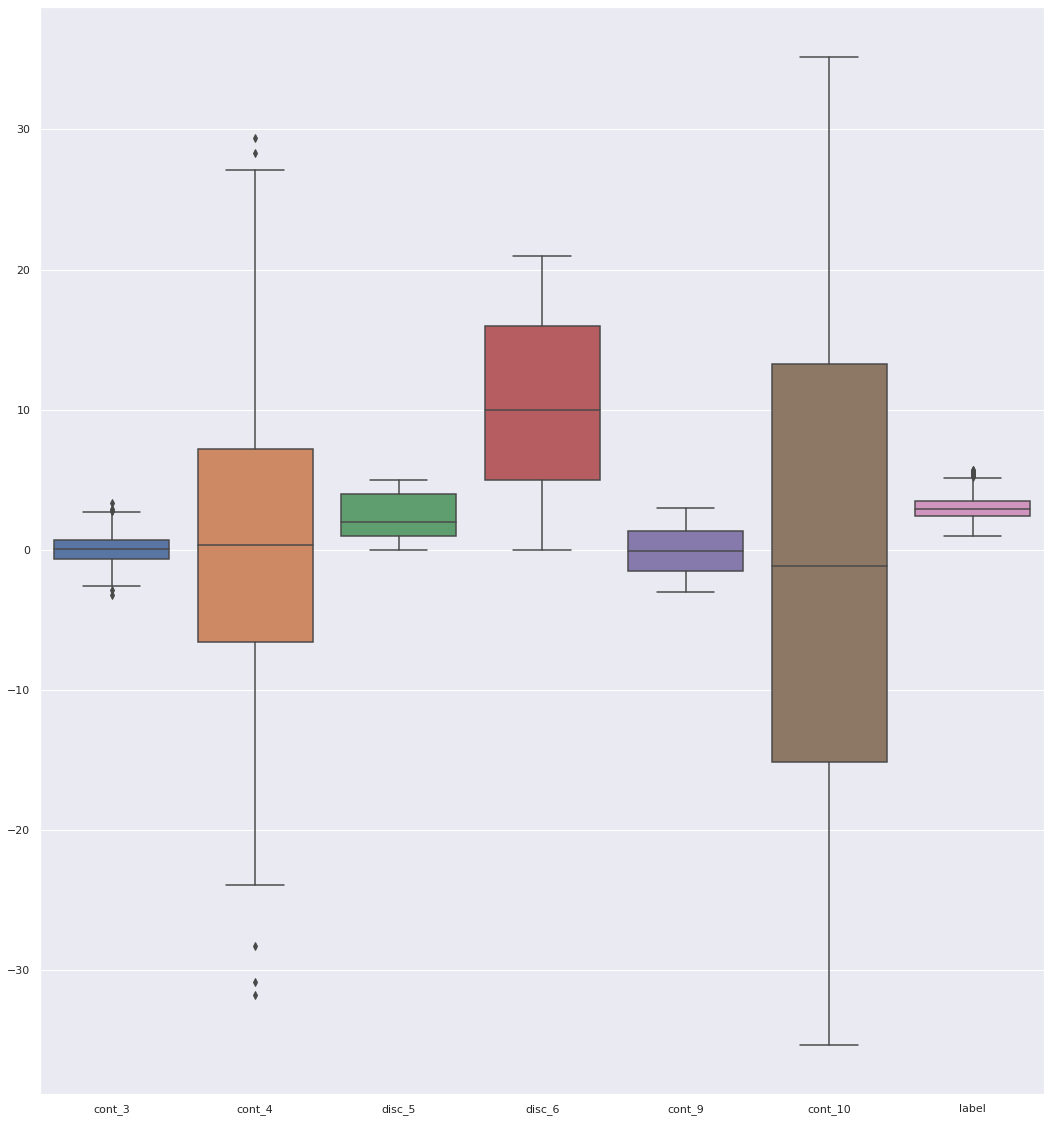

In [458]:
#to see which numerical variables have outliers
sns.set(rc={'figure.figsize':(18,20)})
sns.boxplot(data=df.iloc[:,3:12])

In [459]:
def f_outliers(variable):
  q1 = variable.quantile(0.25)
  q3 = variable.quantile(0.75)
  iqr = q3 - q1    
  filter = (variable >= q1 - 1.5 * iqr) & (variable <= q3 + 1.5 *iqr)
  return filter

df=df.loc[f_outliers(df['cont_3'])]
df=df.loc[f_outliers(df['cont_4'])]
df=df.loc[f_outliers(df['label'])]

print("after the cleaning process there are {} rows left in the total dataset".format(len(df)))

after the cleaning process there are 789 rows left in the total dataset


In [460]:
#encoding categorical variables

lb1 = LabelEncoder()
df["cat_7_enc"] = lb1.fit_transform(df["cat_7"])
print(df[['cat_7','cat_7_enc']].drop_duplicates())

df['cat_7']=df['cat_7_enc']
print("")

lb2 = LabelEncoder()
df["cat_8_enc"] = lb2.fit_transform(df["cat_8"])
print(df[['cat_8','cat_8_enc']].drop_duplicates())

df['cat_8']=df['cat_8_enc']

df=df.iloc[:,0:12]
df

        cat_7  cat_7_enc
0       happy          0
1   surprised          3
3      scared          2
15        sad          1

     cat_8  cat_8_enc
0     blue          0
1    green          1
3   purple          3
10  orange          2
12  yellow          5
19     red          4


,index,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,cont_10,label
0,0,NaN,2003-04-06,-0.90,-3.82,1,19,0,0,0.37,3.92,2.50
1,1,UV7055,2013-08-22,-0.35,2.23,5,13,3,1,0.05,0.60,3.19
2,2,oM1806,2002-10-10,0.93,-12.12,2,11,0,1,0.08,0.75,2.33
3,3,YJ8175,2015-01-01,1.23,-7.21,1,14,2,3,-0.69,-7.24,2.54
4,4,VF7543,2014-03-03,-1.87,-9.02,3,9,0,0,1.01,11.16,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...
807,993,sx2025,2002-01-15,-0.18,-13.91,3,2,3,1,-0.55,-6.22,1.72
808,994,mv6453,2002-02-03,-0.05,-1.84,2,7,0,1,2.28,19.93,3.38
809,995,SW6268,2001-11-30,-0.42,-18.36,2,16,2,2,2.70,23.41,3.49
810,996,QR0417,2010-02-04,-1.85,-8.99,1,9,3,1,-1.12,-9.16,1.27


In [461]:
#eliminate correlated variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,index,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,cont_10,label
index,1.000000,0.035760,-0.018607,-0.020900,-0.019877,0.036923,0.011068,-0.038733,-0.035735,-0.011241
cont_3,0.035760,1.000000,-0.031166,0.016734,-0.009480,0.031769,-0.030107,-0.003332,-0.009839,0.369472
cont_4,-0.018607,-0.031166,1.000000,-0.075186,0.017547,0.015059,-0.014382,-0.082243,-0.082375,0.291245
disc_5,-0.020900,0.016734,-0.075186,1.000000,-0.026560,-0.081549,-0.010163,-0.048613,-0.045934,0.333528
disc_6,-0.019877,-0.009480,0.017547,-0.026560,1.000000,0.028990,-0.000864,-0.038769,-0.041752,0.326514
cat_7,0.036923,0.031769,0.015059,-0.081549,0.028990,1.000000,-0.021804,0.033590,0.034104,0.014696
cat_8,0.011068,-0.030107,-0.014382,-0.010163,-0.000864,-0.021804,1.000000,0.011926,0.020334,0.002116
cont_9,-0.038733,-0.003332,-0.082243,-0.048613,-0.038769,0.033590,0.011926,1.000000,0.995122,0.535109
cont_10,-0.035735,-0.009839,-0.082375,-0.045934,-0.041752,0.034104,0.020334,0.995122,1.000000,0.535274
label,-0.011241,0.369472,0.291245,0.333528,0.326514,0.014696,0.002116,0.535109,0.535274,1.000000


In [462]:
df.drop('cont_10', inplace=True, axis=1)
df.head()

,index,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,label
0,0,NaN,2003-04-06,-0.90,-3.82,1,19,0,0,0.37,2.50
1,1,UV7055,2013-08-22,-0.35,2.23,5,13,3,1,0.05,3.19
2,2,oM1806,2002-10-10,0.93,-12.12,2,11,0,1,0.08,2.33
3,3,YJ8175,2015-01-01,1.23,-7.21,1,14,2,3,-0.69,2.54
4,4,VF7543,2014-03-03,-1.87,-9.02,3,9,0,0,1.01,2.10


# **Model Training and Prediction**

In [463]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

dataX = df.iloc[:,3:10]
dataY = df.iloc[:, 10]

x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio, random_state=123)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=123) 

In [464]:
rf = RandomForestRegressor(n_estimators=300, random_state=12)
rf.fit(x_train, y_train)

y_pred_val = rf.predict(x_val)
errors = abs(y_pred_val - y_val)
mape = 100 * (errors / y_val)  # Calculating mean absolute percentage error (MAPE)
accuracy = 100 - np.mean(mape)
print('Accuracy of validation set:', round(accuracy, 2), '%.')

Accuracy of validation set: 91.67 %.


In [465]:
y_pred_test = rf.predict(x_test)
errors_t = abs(y_pred_test - y_test)
mape_t = 100 * (errors_t/ y_test)
accuracy = 100 - np.mean(mape_t)
print('Accuracy of test set:', round(accuracy, 2), '%.')

Accuracy of test set: 92.27 %.


In [466]:
#checking test set results
df_test=df.loc[list(x_test.index),:]
df_test['predictions']=y_pred_test.round(2)
df_test['mape']= abs(df_test.predictions - df_test.label)/ df_test.label
print("t_s acc: {} %".format(round(((1-df_test['mape'].mean())*100),2)))
print(df_test)

t_s acc: 92.26 %
     index   key_1     date_2  cont_3  ...  cont_9  label  predictions      mape
137    171  qT6436 2008-09-11   -1.48  ...    1.21   1.57         2.10  0.337580
80      99  BI0505 2012-03-20   -1.30  ...    1.06   2.79         3.02  0.082437
756    927  lX4962 2008-01-29   -0.78  ...    0.49   2.20         2.27  0.031818
633    776  rE8139 2002-11-01    0.30  ...    2.77   4.37         4.02  0.080092
236    280  Fc5593 2009-06-03   -0.44  ...    2.92   4.24         4.06  0.042453
..     ...     ...        ...     ...  ...     ...    ...          ...       ...
786    970  Da5333 2008-04-01   -0.89  ...    2.28   3.35         3.27  0.023881
526    639  WU1978 2015-02-23    0.36  ...    0.54   2.26         2.27  0.004425
255    307  yO8943 2002-02-18    1.52  ...    1.70   3.16         3.42  0.082278
652    805  xB6512 2020-06-22   -1.25  ...   -2.19   2.29         2.50  0.091703
258    310  XW1393 2013-09-22    1.34  ...   -1.43   3.69         3.62  0.018970

[80 rows x

Text(0.5, 0, 'Random Forest Feature Importance')

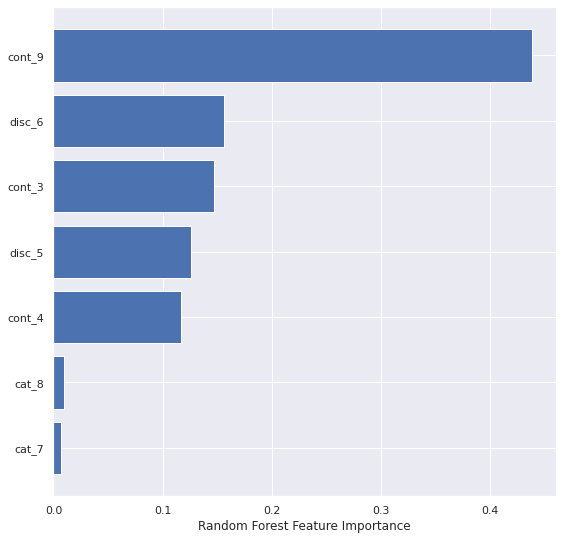

In [468]:
sorted_idx = rf.feature_importances_.argsort()
sns.set(rc={'figure.figsize':(9,9)})
plt.barh(dataX.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [490]:
rfi=pd.DataFrame(rf.feature_importances_,columns=['rf_feature_imp'])
rfi.index=dataX.columns
rfi.sort_values(by='rf_feature_imp',ascending=False)

,rf_feature_imp
cont_9,0.438107
disc_6,0.156090
cont_3,0.146970
disc_5,0.125879
cont_4,0.117057
cat_8,0.009382
cat_7,0.006515
